In [11]:
import matplotlib.pyplot as plt
import librosa.display
import numpy as np
import utilities
import features
import pitchspace
import scipy
import dataloader
# set path to repo
PATH = "/home/max/ET-TI/Masterarbeit/"

/home/max/.local/lib/python3.10/site-packages/librosa/util/decorators.py:88: UserWarning: n_fft=1024 is too small for input signal of length=1000
  return f(*args, **kwargs)


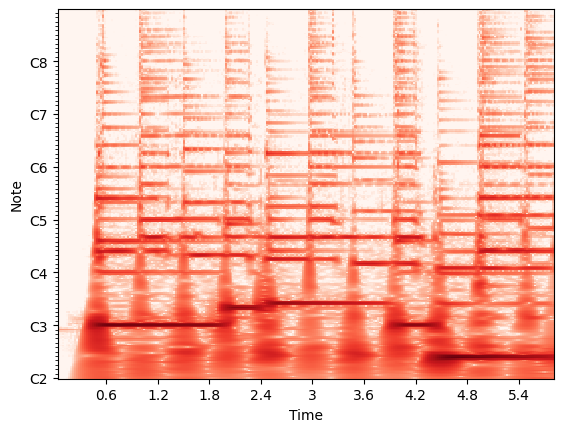

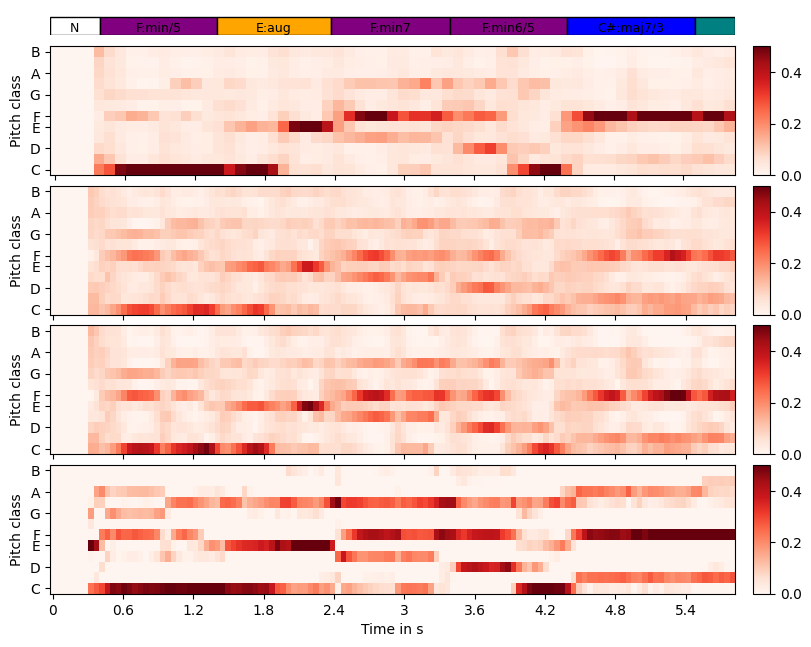

In [12]:
beatles = dataloader.Dataloader("beatles","/home/max/ET-TI/Masterarbeit/mirdata")
audiopath,annotationpath = beatles["0607"]  # 0607 michelle
time_interval = (0,5.8)
t,sig = utilities.loadAudio(audiopath,t_stop=time_interval[1])
gt = utilities.loadAnnotations(annotationpath)
t_cqt,cqt = features.cqt(sig)
fig,ax = plt.subplots()
img = librosa.display.specshow(librosa.amplitude_to_db(cqt,ref=np.max),ax=ax,
                               cmap="Reds",
                               x_coords=t_cqt,x_axis="time",y_axis="cqt_note",fmin=librosa.midi_to_hz(36),bins_per_octave=36)
t_chroma, chroma = features.cqtChroma(sig)
t_chroma_crp, chroma_crp = features.crpChroma(sig, liftering=False, window=False)
t_chroma_crp, chroma_crp_window = features.crpChroma(sig, liftering=False, window=True)
t_chroma_crp, chroma_crp_lift_window = features.crpChroma(sig, nCRP=45, window=True)
## Prefiltering strategies
fig,ax = plt.subplots(5,2,width_ratios=(20,.5),height_ratios=(1,5,5,5,5),figsize=(9,8))
utilities.plotChordAnnotations(ax[0,0],gt,(0,time_interval[1]))
ax[0,1].set_axis_off()
img = utilities.plotChromagram(ax[1,0],t_chroma,chroma,chroma_type="cqt")
fig.colorbar(img,cax=ax[1,1])
ax[1,0].set_xticklabels([])
ax[1,0].set_xlabel("")
img = utilities.plotChromagram(ax[2,0],t_chroma_crp,chroma_crp,chroma_type="cqt")
fig.colorbar(img,cax=ax[2,1])
ax[2,0].set_xticklabels([])
ax[2,0].set_xlabel("")

img = utilities.plotChromagram(ax[3,0],t_chroma_crp,chroma_crp_window,chroma_type="cqt")
fig.colorbar(img,cax=ax[3,1])
ax[3,0].set_xticklabels([])
ax[3,0].set_xlabel("")
img = utilities.plotChromagram(ax[4,0],t_chroma_crp,chroma_crp_lift_window,chroma_type="cqt")
fig.colorbar(img,cax=ax[4,1])
fig.subplots_adjust(wspace=0.05,hspace=0.1,left=0.1,bottom=0.15)
if True:
    FILENAME = "latex/figures/cqt_crp_michelle.png"
    fig.savefig(PATH+FILENAME,dpi=300)

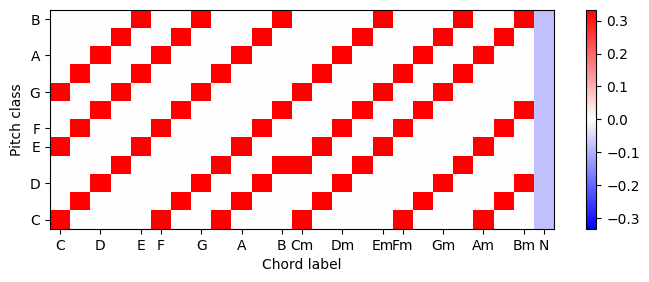

In [19]:
# plot Templates
FILENAME = "latex/figures/templates.png"
templates,labels = utilities.createChordTemplates(template_type="majmin")
fig,ax = plt.subplots(figsize=(9,3))
img = librosa.display.specshow(templates,ax=ax, cmap="bwr",vmin=-np.max(templates),vmax=np.max(templates))
xticklabels = ["C","D","E","F","G","A","B","Cm","Dm","Em","Fm","Gm","Am","Bm","N"]
xticks = [0,2,4,5,7,9,11,12,14,16,17,19,21,23,24]
ax.set_xticks(xticks)
ax.set_xticklabels(xticklabels)
ax.set_yticks(xticks[:7])
ax.set_yticklabels(xticklabels[:7])
ax.set_ylabel("Pitch class")
ax.set_xlabel("Chord label")
cbar = fig.colorbar(img, ax=ax)
fig.subplots_adjust(bottom=0.15)
fig.savefig(PATH+FILENAME,dpi=200)


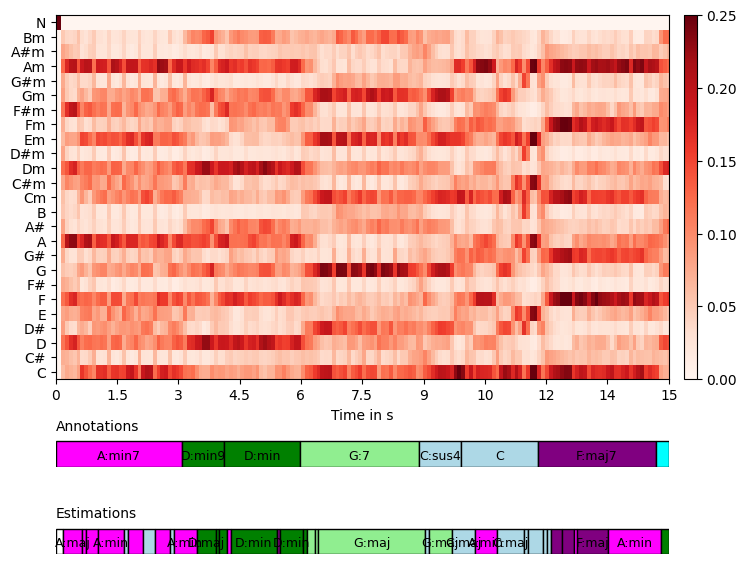

In [ ]:
## Correlation Matrix
FILENAME = "latex/figures/template_recognition_result_correlation.png"

chroma_type = "cqt"
title = "11_-_Abbey_Road/09_-_You_Never_Give_Me_Your_Money"
gt = utilities.loadAnnotations(PATH+f"mirdata/beatles/annotations/chordlab/The Beatles/{title}.lab")
t,sig = utilities.loadAudio(PATH+f"mirdata/beatles/audio/{title}.wav",t_stop=30)

# michelle
# beatles = dataloader.Dataloader("beatles","/home/max/ET-TI/Masterarbeit/mirdata")
# audiopath,annotationpath = beatles["0607"]  # 0607 michelle
# t,sig = utilities.loadAudio(audiopath,t_stop=30)
# gt = utilities.loadAnnotations(annotationpath)

# t_chroma, chroma = features.crpChroma(sig,nCRP=45,liftering=True,window=False)
t_chroma, chroma = features.cqtChroma(sig,rms_thresholding=True)
templates,labels = utilities.createChordTemplates(template_type="majmin") # majmin ,triads,triads_extended, majmin_sevenths
correlation = np.matmul(templates.T,chroma)

fig,((ax1,ax11),(ax0,ax00),(ax01,ax02)) = plt.subplots(3,2,height_ratios=(10,1,1),width_ratios=(50,1),figsize=(8.27,7))
# plot Annotations
ax00.set_axis_off()
ax02.set_axis_off()
utilities.plotChordAnnotations(ax0,gt,(0,15))
ax0.text(0,2,"Annotations")
# plot estimation
estimated_labels = [labels[np.argmax(correlation[:,i])] for i in range(chroma.shape[1])]
estimation =  utilities.createChordIntervals(t_chroma,estimated_labels)
utilities.plotChordAnnotations(ax01,estimation,(0,15))
ax01.text(0,2,"Estimations")
# plot correlation 
img = librosa.display.specshow(correlation, ax=ax1, x_coords=t_chroma.T,x_axis='time',
                                vmin=0,vmax=0.25,cmap="Reds")
yticklabels = ["C","C#","D","D#","E","F","F#","G","G#","A","A#","B","Cm","C#m","Dm","D#m","Em","Fm","F#m","Gm","G#m","Am","A#m","Bm","N"]
yticks = np.arange(0,25,1)
ax1.set_yticks(yticks)
ax1.set_yticklabels(yticklabels) 
ax1.set_xlim([0,15])
ax1.set_xlabel("Time in s")
fig.colorbar(img,cax=ax11)
fig.subplots_adjust(hspace=0.35,wspace=0.05)

fig.savefig(PATH+FILENAME,dpi=400)

circular Pitch space system

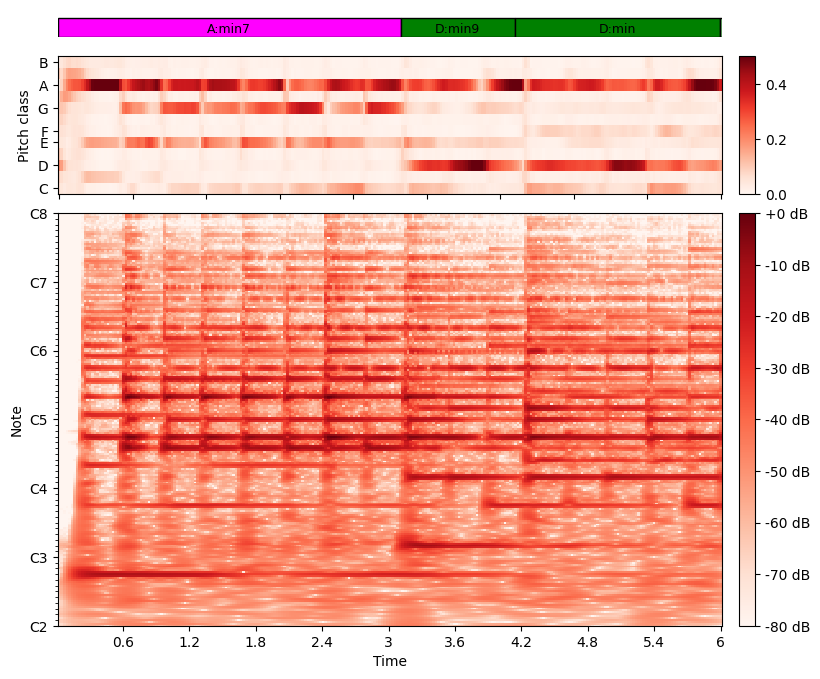

In [ ]:
beatles = dataloader.Dataloader("beatles","/home/max/ET-TI/Masterarbeit/mirdata")
audiopath,annotationpath = beatles["1109"]
t,sig = utilities.loadAudio(audiopath,t_stop=6)
gt = utilities.loadAnnotations(annotationpath)
t_chroma,chroma = features.cqtChroma(sig)
estimated_tuning = librosa.estimate_tuning(y=sig,sr=22050,bins_per_octave=36)

cqt = np.abs(librosa.vqt(sig,fmin=librosa.midi_to_hz(36),
                    bins_per_octave=36,n_bins=7*36, sr=22050, tuning=estimated_tuning,gamma=0))
t_cqt = np.linspace(512/22050,sig.shape[0]/22050,cqt.shape[1])

# pick every third coefficient from oversampled and tuned cqt
pitchgram_cqt = np.finfo(float).eps * np.ones((120,cqt.shape[1])) 

# pitch folding
for note in range(36,120):
    try:
        pitchgram_cqt[note,:] = np.exp(-(note-60)**2 / (2* 15**2)) * cqt[(note-120)*3,:]
        #pitchgram_cqt[note,:] = cqt[(note-120)*3,:]
    except IndexError:
        break
pitchgram_cqt = pitchgram_cqt.reshape(10,12,-1)
chroma = np.sum(pitchgram_cqt, axis=0)
chroma = chroma / np.sum(np.abs(chroma)+np.finfo(float).eps,axis=0)
fig,ax = plt.subplots(3,2,width_ratios=(20,.5),height_ratios=(1,5,15),figsize=(9,8))
utilities.plotChordAnnotations(ax[0,0],gt,(0,6))
ax[0,1].set_axis_off()
img = utilities.plotChromagram(ax[1,0],t_chroma,chroma,chroma_type="cqt")
fig.colorbar(img,cax=ax[1,1])
ax[1,0].set_xlabel("")
ax[1,0].set_xticks(np.linspace(0,6,10))
ax[1,0].set_xticklabels([])
img = librosa.display.specshow(librosa.amplitude_to_db(cqt,ref=np.max),ax=ax[2,0],
                               cmap="Reds",
                               x_coords=t_cqt,x_axis="time",y_axis="cqt_note",fmin=librosa.midi_to_hz(36),bins_per_octave=36)
ax[2,0].set_ylim(librosa.midi_to_hz(36),librosa.midi_to_hz(36+72))
fig.colorbar(img, cax=ax[2,1], format="%+2.f dB")
fig.subplots_adjust(hspace=0.1,wspace=0.05)

if True:
    FILENAME = "latex/figures/chroma_younevergiveme.png"
    fig.savefig(PATH+FILENAME,dpi=300)

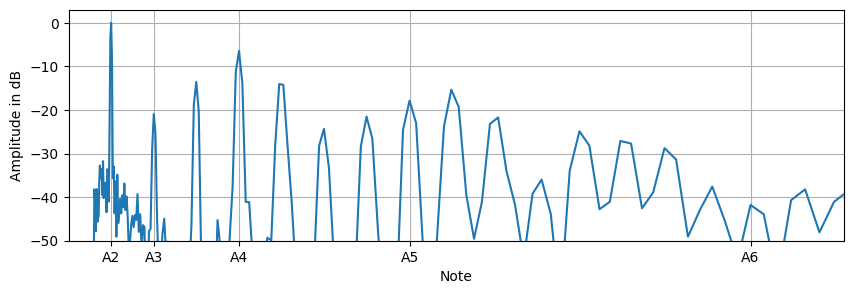

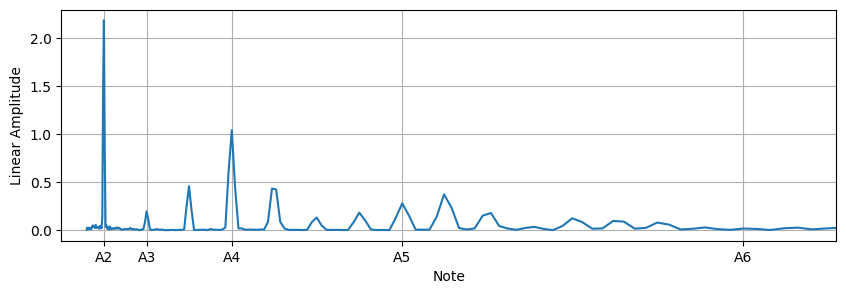

In [ ]:
# CQT spectrum at t = 0.5s
fig,ax = plt.subplots(figsize=(10,3))
f = librosa.cqt_frequencies(7*36, fmin=librosa.midi_to_hz(36),bins_per_octave=36)
cqt_db = librosa.amplitude_to_db(cqt[:,20],ref=np.max)
ax.plot(f,cqt_db)
ax.set_xticks([110,220,440,880,1760])
ax.set_xticklabels(["A2","A3","A4","A5","A6"])
ax.set_xlim(0,2000)
ax.set_ylim(-50,3)
ax.grid()
ax.set_xlabel("Note")
ax.set_ylabel("Amplitude in dB")

FILENAME = "latex/figures/overtone_younevergiveme_db.png"
fig.savefig(PATH+FILENAME,dpi=300)

fig,ax = plt.subplots(figsize=(10,3))
f = librosa.cqt_frequencies(7*36, fmin=librosa.midi_to_hz(36),bins_per_octave=36)
ax.plot(f,cqt[:,20])
ax.set_xticks([110,220,440,880,1760])
ax.set_xticklabels(["A2","A3","A4","A5","A6"])
ax.set_xlim(0,2000)
ax.grid()
ax.set_xlabel("Note")
ax.set_ylabel("Linear Amplitude")

FILENAME = "latex/figures/overtone_younevergiveme.png"
fig.savefig(PATH+FILENAME,dpi=300)